In [56]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import signal
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [57]:
data = pd.read_csv('data_scaled.csv')

In [58]:
data.head()

,x,y,z,activity
0,0.457376,0.689453,0.421540,Walking
1,0.438482,0.717446,0.420169,Walking
2,0.544191,0.755916,0.477840,Walking
3,0.487291,0.800191,0.390204,Walking
4,0.391350,0.836838,0.224368,Walking


In [59]:
# list=data.activity.unique()
# list=list.tolist()
# list
# list.pop()
# filtered_data = data[~data['activity'].isin(list)]
# filtered_data
# data1=data.drop(filtered_data.index)
# data1.shape

In [60]:
X = data1[['x', 'y', 'z']]
y = data1['activity']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_good = label_encoder.fit_transform(y_train)
y_test_good = label_encoder.fit_transform(y_test)

In [63]:
data.shape

(648482, 4)

In [64]:
data1.shape


(648481, 4)

In [65]:
list=data1.activity.unique()
list

array(['Walking', 'Jogging', 'Stairs', 'Sitting', 'Standing', 'Typing',
       'Brushing Teeth', 'Eating Soup', 'Eating Chips', 'Eating Pasta',
       'Drinking from Cup', 'Eating Sandwich', 'Kicking (Soccer Ball)',
       'Playing Catch w/Tennis Ball', 'Dribbling (Basketball)', 'Writing',
       'Clapping', 'Folding Clothes'], dtype=object)

# Podział na okna czasowe

In [66]:
# import numpy as np
#
# def create_time_windows_20Hz(data, labels, window_size_seconds, overlap):
#     """
#     Dzieli dane próbkowane na 20 Hz na okna czasowe.
#
#     Parametry:
#     - data: NumPy array z danymi (kształt: [n_próbek, n_kanłów])
#     - labels: NumPy array z etykietami (kształt: [n_próbek,])
#     - window_size_seconds: długość okna w sekundach (np. 3)
#     - overlap: procent nakładania (np. 0.5 dla 50%)
#
#     Zwraca:
#     - windows: NumPy array z oknami danych (kształt: [n_okien, rozmiar_okna, n_kanłów])
#     - window_labels: NumPy array z etykietami dla okien
#     """
#     freq = 20  # Hz
#     window_size = int(window_size_seconds * freq)  # Rozmiar okna w próbkach
#     step = int(window_size * (1 - overlap))  # Przesunięcie okna
#
#     windows = []
#     window_labels = []
#
#     for start in range(0, len(data) - window_size + 1, step):
#         end = start + window_size
#         windows.append(data[start:end])
#         # Etykieta dla okna to najczęstsza wartość w oknie
#         window_labels.append(np.bincount(labels[start:end]).argmax())
#
#     return np.array(windows), np.array(window_labels)
#
# data = X_train  # 3600 próbek, 3 kanały
# labels = y_train_good # Jedna aktywność (etykieta 0)
#
# # Parametry okna czasowego
# window_size_seconds = 180
# overlap = 0.5
#
# # Dzielimy na okna
# X, y = create_time_windows_20Hz(data, labels, window_size_seconds, overlap)
#
# print("Kształt danych po podziale na okna:")
# print(f"windows: {X.shape}")  # (n_okien, długość_okna, liczba_kanłów)
# print(f"window_labels: {y.shape}")  # (n_okien,)


In [67]:
import numpy as np
import pandas as pd
from scipy.stats import mode
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Constants
N_TIME_STEPS = 90
N_FEATURES = 3
step = 20
RANDOM_SEED = 42

segments = []
labels = []
from collections import Counter
# Loop to segment the data
for i in range(0, len(data1) - N_TIME_STEPS, step):
    xs = data1['x'].values[i: i + N_TIME_STEPS]
    ys = data1['y'].values[i: i + N_TIME_STEPS]
    zs = data1['z'].values[i: i + N_TIME_STEPS]

    # Replace stats.mode with an alternative using collections.Counter
    segment_labels = data1['activity'][i: i + N_TIME_STEPS]
    label = Counter(segment_labels).most_common(1)[0][0]  # Calculate mode

    # Append data and labels
    segments.append([xs, ys, zs])
    labels.append(label)

# Reshape segments and encode labels
reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype=np.float32)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

# Expand dimensions for TensorFlow compatibility
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

In [68]:
X_train.shape

TensorShape([25936, 90, 3, 1])

# CNN

In [69]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

AttributeError: 'Series' object has no attribute 'reshape'

In [56]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# y_good = label_encoder.fit_transform(y)
# y_good

array([3, 4, 4, 2, 2, 4, 1, 4, 3, 8, 3, 1, 1, 3, 3, 1, 3, 3, 8, 4, 3, 3,
       2, 3, 3, 4, 3, 3, 1, 1, 2, 2, 3, 4, 4, 3, 3, 4, 1, 2, 2, 1, 2, 3,
       4, 3, 6, 4, 4, 1, 2, 2, 4, 8, 2, 3, 1, 2, 1, 1, 1, 3, 8, 8, 4, 4,
       4, 3, 4, 4, 4, 4, 4, 4, 2, 3, 3, 2, 8, 4, 1, 1, 1, 2, 2, 3, 1, 3,
       3, 3, 3, 3, 3, 2, 1, 3, 8, 4, 6, 1, 3, 3, 8, 8, 4, 4, 8, 8, 8, 8,
       4, 4, 8, 8, 4, 4, 4, 4, 4, 2, 4, 3, 1, 4, 2, 2, 4, 3, 4, 2, 8, 4,
       4, 4, 4, 2, 3, 3, 1, 3, 3, 3, 3, 4, 3, 3, 1, 1, 8, 3, 3, 8, 8, 4,
       1, 1, 4, 8, 8, 2, 3, 8, 4, 2, 2, 3, 2, 3, 8, 4, 4, 4, 4, 1, 8, 4,
       1, 3, 2, 1, 4, 0, 3, 3, 3, 3, 8, 1, 3, 2, 4, 4, 2, 4, 4, 2, 1, 1,
       2, 2, 1, 3, 3, 8, 3, 4, 2, 1, 3, 8, 8, 2, 1, 4, 2, 8, 3, 1, 4, 1,
       1, 2, 8, 2, 2, 3, 4, 4, 1, 1, 8, 4, 3, 1, 4, 4, 2, 2, 3, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 4, 4, 4, 4, 2, 2, 2, 1, 1, 3, 4, 8, 8, 4, 3, 3,
       7, 4, 4, 2, 2, 2, 3, 3, 5, 2, 3, 3, 3, 4, 1, 8, 2, 2, 8, 8, 8, 2,
       2])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y_good, test_size=0.2)


In [27]:
y

array([ 4,  3,  3,  4, 16, 16,  6,  7,  7,  7,  7,  6,  6,  4,  7,  5,  3,
       16,  7,  3, 16, 16,  3,  3,  3, 16, 16, 16,  4,  4,  5, 16,  7,  7,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  4,  4,  6,  7,  7,  6,  6,  7,
        4,  6,  6,  6,  6,  6,  6,  7,  7,  4,  6,  4,  4,  3, 16,  3,  3,
        4,  4,  7,  7,  7,  4,  7,  7,  7,  7,  6,  7,  7,  7,  6,  6,  7,
       16, 12,  6,  7,  4, 16,  6,  6,  7,  7,  5,  7,  7,  4,  6,  6,  7,
        3, 16,  6,  4,  4,  7,  6,  4,  3,  7,  4,  4, 16,  7,  4, 16, 16,
        7,  7,  6,  6, 16,  7,  3,  7,  7,  6,  6,  6,  4,  4,  3,  4,  6,
       16,  4,  6, 16, 16, 16, 16, 16,  6,  6,  7,  7, 16,  3,  4,  3, 16,
       12, 16,  3,  7,  7,  3,  7,  4,  3,  7,  6, 16,  3,  3,  6,  6, 16,
        3,  7,  4,  7,  7,  7,  7,  6,  0,  4,  6,  6,  0,  7, 16, 16,  7,
        3,  7,  7, 16, 16, 16,  4, 16, 16, 16, 16,  6,  6,  4, 16,  7,  6,
        3,  3,  3,  6,  4,  3,  7,  7,  6,  7,  4,  3,  3,  4,  4,  3,  7,
        7, 16, 16,  4, 16

In [28]:
from collections import Counter
print("Rozkład etykiet w zbiorze treningowym:", Counter(np.argmax(y_train, axis=1)))
print("Rozkład etykiet w zbiorze testowym:", Counter(np.argmax(y_test, axis=1)))



AxisError: axis 1 is out of bounds for array of dimension 1

In [29]:
y_train

array([4, 5, 5, 8, 8, 5, 1, 2, 8, 5, 5, 8, 8, 2, 2, 5, 2, 5, 2, 5, 8, 8,
       2, 4, 3, 4, 4, 0, 1, 8, 2, 8, 4, 4, 2, 8, 1, 8, 2, 5, 4, 4, 4, 4,
       5, 4, 4, 5, 8, 2, 2, 1, 8, 4, 4, 8, 2, 5, 2, 5, 2, 5, 4, 8, 5, 5,
       5, 4, 4, 2, 4, 2, 4, 5, 5, 4, 1, 4, 5, 5, 8, 2, 4, 2, 4, 2, 3, 4,
       4, 1, 4, 1, 8, 5, 1, 4, 8, 4, 1, 8, 4, 8, 2, 1, 5, 4, 5, 5, 5, 8,
       5, 1, 5, 5, 4, 4, 2, 1, 1, 4, 1, 5, 8, 5, 4, 8, 1, 8, 8, 5, 4, 4,
       2, 1, 2, 5, 5, 5, 1, 8, 8, 4, 1, 4, 5, 6, 5, 1, 8, 8, 8, 4, 8, 1,
       2, 2, 1, 1, 1, 8, 4, 2, 5, 8, 5, 7, 2, 5, 8, 5, 4, 1, 4, 8, 4, 2,
       4, 5, 2, 2, 5, 5, 1, 8, 8, 5, 5, 5, 4, 5, 2, 2, 8, 1, 2, 5, 5, 6,
       2, 2, 4, 2, 4, 5, 8, 1, 1, 5, 5, 5, 5, 1, 5, 4, 4, 5, 1, 5, 5, 5,
       5, 4, 4, 5, 5, 1, 5, 5, 0])

In [58]:
input_shape = X_train.shape[1:]

In [59]:
X_train.shape

(229, 3600, 3)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=256, kernel_size=3, activation='relu'),  # Więcej filtrów
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(256, activation='relu'),  # Więcej neuronów
    Dropout(0.4),
    Dense(18, activation='softmax')  # 18 klas
])


In [71]:
# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #categorical crossentropy jest dla klasyfiakcji wieloklasowej

# Trenowanie modelu
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/50
649/649 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.7771 - loss: 0.5529 - val_accuracy: 0.8385 - val_loss: 0.4479
Epoch 2/50
649/649 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7830 - loss: 0.5426 - val_accuracy: 0.8321 - val_loss: 0.4622
Epoch 3/50
649/649 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7862 - loss: 0.5307 - val_accuracy: 0.8078 - val_loss: 0.5145
Epoch 4/50
649/649 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7935 - loss: 0.5165 - val_accuracy: 0.8319 - val_loss: 0.4473
Epoch 5/50
649/649 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7939 - loss: 0.5118 - val_accuracy: 0.8626 - val_loss: 0.4294
Epoch 6/50
649/649 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7980 - loss: 0.5054 - val_accuracy: 0.7712 - val_loss: 0.6059
Epoch 7/50
649/649 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8113 - loss: 0.4692 - val_accuracy: 0.8273 - val_loss: 0.4962
Epoch 8/50
649/649 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7965 - loss: 0.5057 - v

In [74]:
# Ewaluacja modelu
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Podsumowanie modelu
model.summary()

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7010 - loss: 1.2792
Test Accuracy: 0.70


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 88, 64)         │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 44, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 44, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 42, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 19, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 9, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,832 (8.22 MB)

 Trainable params: 718,610 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,437,222 (5.48 MB)

# Drugi model

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Definicja modelu
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    # Pierwsza warstwa konwolucyjna
    Conv1D(filters=32, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),

    # Druga warstwa konwolucyjna
    Conv1D(filters=64, kernel_size=10, activation='relu'),
    MaxPooling1D(pool_size=2),

    # Trzecia warstwa konwolucyjna
    Conv1D(filters=128, kernel_size=15, activation='relu'),
    MaxPooling1D(pool_size=2),

    # Spłaszczenie danych
    Flatten(),

    # Warstwy Dense
    Dense(128, activation='relu'),
    Dropout(0.5),  # Zapobieganie przeuczeniu
    Dense(64, activation='relu'),

    # Warstwa wyjściowa
    Dense(18, activation='softmax')
])

In [113]:

# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Podsumowanie modelu
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)              │ (None, 86, 32)         │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 43, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 34, 64)         │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 17, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 3, 128)         │       123,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,002 (664.07 KB)

 Trainable params: 170,002 (664.07 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
# Trening modelu
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.3)

# Wyświetlenie kluczowych informacji z historii
print(history.history.keys())


Epoch 1/30
568/568 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.1680 - loss: 2.4362 - val_accuracy: 0.3460 - val_loss: 1.7616
Epoch 2/30
568/568 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3463 - loss: 1.7426 - val_accuracy: 0.4298 - val_loss: 1.5410
Epoch 3/30
568/568 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4386 - loss: 1.5074 - val_accuracy: 0.5120 - val_loss: 1.2929
Epoch 4/30
568/568 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4913 - loss: 1.3541 - val_accuracy: 0.5476 - val_loss: 1.1924
Epoch 5/30
568/568 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5422 - loss: 1.2158 - val_accuracy: 0.6128 - val_loss: 1.0554
Epoch 6/30
568/568 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5744 - loss: 1.1425 - val_accuracy: 0.7057 - val_loss: 0.8926
Epoch 7/30
568/568 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6079 - loss: 1.0429 - val_accuracy: 0.6918 - val_loss: 0.8061
Epoch 8/30
568/568 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6355 - loss: 0.9749 - val_accuracy: 0.

In [100]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [99]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2, callbacks=[es])

Epoch 1/10
811/811 - 8s - 10ms/step - accuracy: 0.9072 - loss: 0.2490 - val_accuracy: 0.8883 - val_loss: 0.4299
Epoch 2/10
811/811 - 7s - 8ms/step - accuracy: 0.8988 - loss: 0.2631 - val_accuracy: 0.8398 - val_loss: 0.5243
Epoch 3/10
811/811 - 6s - 7ms/step - accuracy: 0.9070 - loss: 0.2523 - val_accuracy: 0.8925 - val_loss: 0.4273
Epoch 4/10
811/811 - 6s - 7ms/step - accuracy: 0.9074 - loss: 0.2425 - val_accuracy: 0.8964 - val_loss: 0.4205
Epoch 5/10
811/811 - 6s - 7ms/step - accuracy: 0.9063 - loss: 0.2455 - val_accuracy: 0.8902 - val_loss: 0.4627
Epoch 6/10
811/811 - 7s - 8ms/step - accuracy: 0.9078 - loss: 0.2450 - val_accuracy: 0.8871 - val_loss: 0.4597
Epoch 7/10
811/811 - 8s - 10ms/step - accuracy: 0.9094 - loss: 0.2356 - val_accuracy: 0.8805 - val_loss: 0.4966
Epoch 8/10
811/811 - 9s - 11ms/step - accuracy: 0.9053 - loss: 0.2556 - val_accuracy: 0.8977 - val_loss: 0.4302
Epoch 9/10
811/811 - 7s - 8ms/step - accuracy: 0.9062 - loss: 0.2448 - val_accuracy: 0.8927 - val_loss: 0.424

In [115]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8174 - loss: 0.5059
Test Accuracy: 0.82


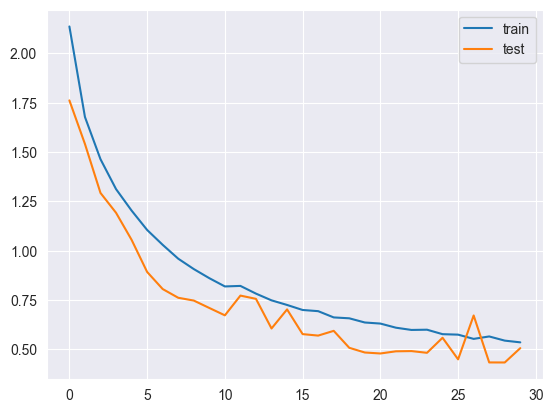

In [116]:
from matplotlib import pyplot
# PLOT TRAINING HISTORY
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

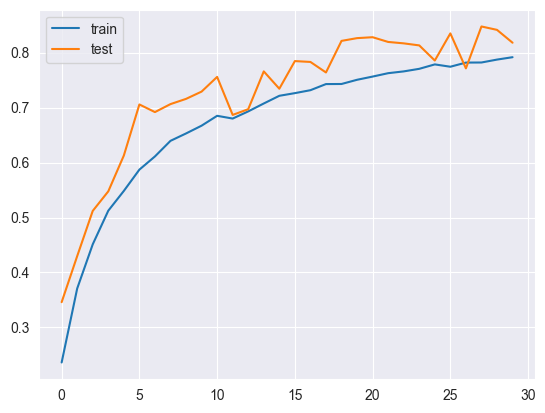

In [117]:
from matplotlib import pyplot
# PLOT TRAINING HISTORY
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [118]:
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)
print(train_acc, test_acc)

[0.45271867513656616, 0.8261875510215759] [0.4931958317756653, 0.8190931677818298]


In [119]:
y_pred = model.predict(X_test)


203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [120]:
y_pred_classes = y_pred.argmax(axis=1)  # Przekształcenie na klasy
y_true_classes = y_test.argmax(axis=1)  # Prawdziwe etykiety w formacie klas


In [121]:
import sklearn
r = sklearn.metrics.confusion_matrix(y_true_classes, y_pred_classes)
print(r)

[[307   0   4   0   1   9   0   5   4   0   0   5   0   0  19   0   0   0]
 [ 30 159   8   9  42  34   1   0   0   0   1   0   2   0   0   1   0  38]
 [  1   1 286   0   1   0   0   0   5   0  19  23   0   0   1   0   0   1]
 [  0   4   0 384   7   2   2   0   0   0   0   0   0   0   0   0   0   2]
 [ 28   0   0   2 315  23   3  10   0   0   0   0   2   0  22   4   0   2]
 [  2   0   0  43  19 272   6  20   0   0   0   0   0   0   0   5   0   0]
 [  1   0   0  36   4   0 340   0   0   0   0   0   5   0   1   8   0  14]
 [  1   0   0   6  32  89  26 243   0   0   0   0   0   0   0  25   0   0]
 [  1   1   4   0   0   0   4   0 249   0   0  54   0   0  10   7   0   0]
 [  0   0   0   0   0   0   0   0   0 390   2   0   0   0   0   0   0   0]
 [  0   0  11   0   0   0   0   0   1   1 266  53   0   0   0   0   3   0]
 [  1   0  19   0   0   0   0   0   3   0  18 273   0   0   1   0   1   0]
 [  3   0   2   3   1   2   1   2   0   0   2   1 308   0   0   3   0  15]
 [  1   0   1   0   0   0

In [124]:
data1.activity.unique()

array(['Walking', 'Jogging', 'Stairs', 'Sitting', 'Standing', 'Typing',
       'Brushing Teeth', 'Eating Soup', 'Eating Chips', 'Eating Pasta',
       'Drinking from Cup', 'Eating Sandwich', 'Kicking (Soccer Ball)',
       'Playing Catch w/Tennis Ball', 'Dribbling (Basketball)', 'Writing',
       'Clapping', 'Folding Clothes'], dtype=object)

# Trzeci model

In [142]:
import scipy.stats as stats

frequency = 20 # Based on Hertz
time_period = 10 # Based on Second
frame_size = frequency * time_period
step_size = frame_size # In order not to have an overlap

def get_frames(df, frame_size, step_size):
    n_features = 3
    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, step_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]

        labels_in_frame = df['activity'].values[i: i + frame_size]
        unique_labels, counts = np.unique(labels_in_frame, return_counts=True)
        label = unique_labels[np.argmax(counts)]
        frames.append([x, y, z])
        labels.append(label)

    frames = np.asarray(frames).reshape(-1, frame_size, n_features)
    labels = np.asarray(labels)

    return frames, labels

In [173]:
X, y = get_frames(data1, frame_size, step_size)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [174]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 3, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 3, 1)

In [175]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
Input(shape=(X_train.shape[1], X_train.shape[2])),

model.add(Conv2D(64, (2, 2), activation = 'relu'))
#     model.add(Dropout(0.1))
#     model.add(Conv2D(64, (2, 2), activation='relu'))
#     model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='softmax'))

# Compiles model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [177]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [178]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=2, callbacks=[es])

Epoch 1/100
82/82 - 3s - 39ms/step - accuracy: 0.1130 - loss: 2.6871 - val_accuracy: 0.2049 - val_loss: 2.3740
Epoch 2/100
82/82 - 1s - 17ms/step - accuracy: 0.1951 - loss: 2.3080 - val_accuracy: 0.2388 - val_loss: 2.1396
Epoch 3/100
82/82 - 1s - 17ms/step - accuracy: 0.2279 - loss: 2.1625 - val_accuracy: 0.2881 - val_loss: 1.9757
Epoch 4/100
82/82 - 1s - 15ms/step - accuracy: 0.2553 - loss: 2.0324 - val_accuracy: 0.2897 - val_loss: 1.8989
Epoch 5/100
82/82 - 1s - 15ms/step - accuracy: 0.2730 - loss: 1.9610 - val_accuracy: 0.3359 - val_loss: 1.8396
Epoch 6/100
82/82 - 1s - 15ms/step - accuracy: 0.3101 - loss: 1.8898 - val_accuracy: 0.2958 - val_loss: 1.8316
Epoch 7/100
82/82 - 1s - 15ms/step - accuracy: 0.3178 - loss: 1.8401 - val_accuracy: 0.3436 - val_loss: 1.7410
Epoch 8/100
82/82 - 1s - 16ms/step - accuracy: 0.3301 - loss: 1.7988 - val_accuracy: 0.3606 - val_loss: 1.7368
Epoch 9/100
82/82 - 1s - 15ms/step - accuracy: 0.3328 - loss: 1.7684 - val_accuracy: 0.3636 - val_loss: 1.7532
E

In [179]:
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)
print(train_acc, test_acc)

[0.5198560357093811, 0.8183571100234985] [1.1689674854278564, 0.6979969143867493]


float64
int64
float64
int64
